<a href="https://colab.research.google.com/github/Alekol1970/ai_society_simulations/blob/main/cg_hr_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess


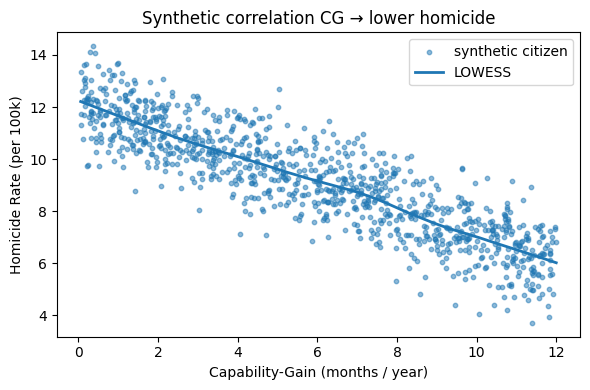

In [ ]:
# !pip install numpy pandas matplotlib statsmodels --quiet
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# -----------------------------
# Симуляция ➀: CG vs Homicide Rate
# -----------------------------
np.random.seed(42)
n = 1000                       # число «виртуальных граждан»
cg = np.random.uniform(0, 12, n)          # Capability-Gain, мес./год
noise = np.random.normal(0, 1, n)         # гауссов шум
hr = np.clip(12 - 0.5*cg + noise, 0, None)  # условная формула

# График
plt.figure(figsize=(6,4))
plt.scatter(cg, hr, s=10, alpha=.5, label='synthetic citizen')
smoothed = lowess(hr, cg, frac=0.3)
plt.plot(smoothed[:,0], smoothed[:,1], linewidth=2, label='LOWESS')
plt.xlabel('Capability-Gain (months / year)')
plt.ylabel('Homicide Rate (per 100k)')
plt.title('Synthetic correlation CG → lower homicide')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
pd.DataFrame({'CG': cg, 'HR': hr}).to_csv('cg_hr_data.csv', index=False)


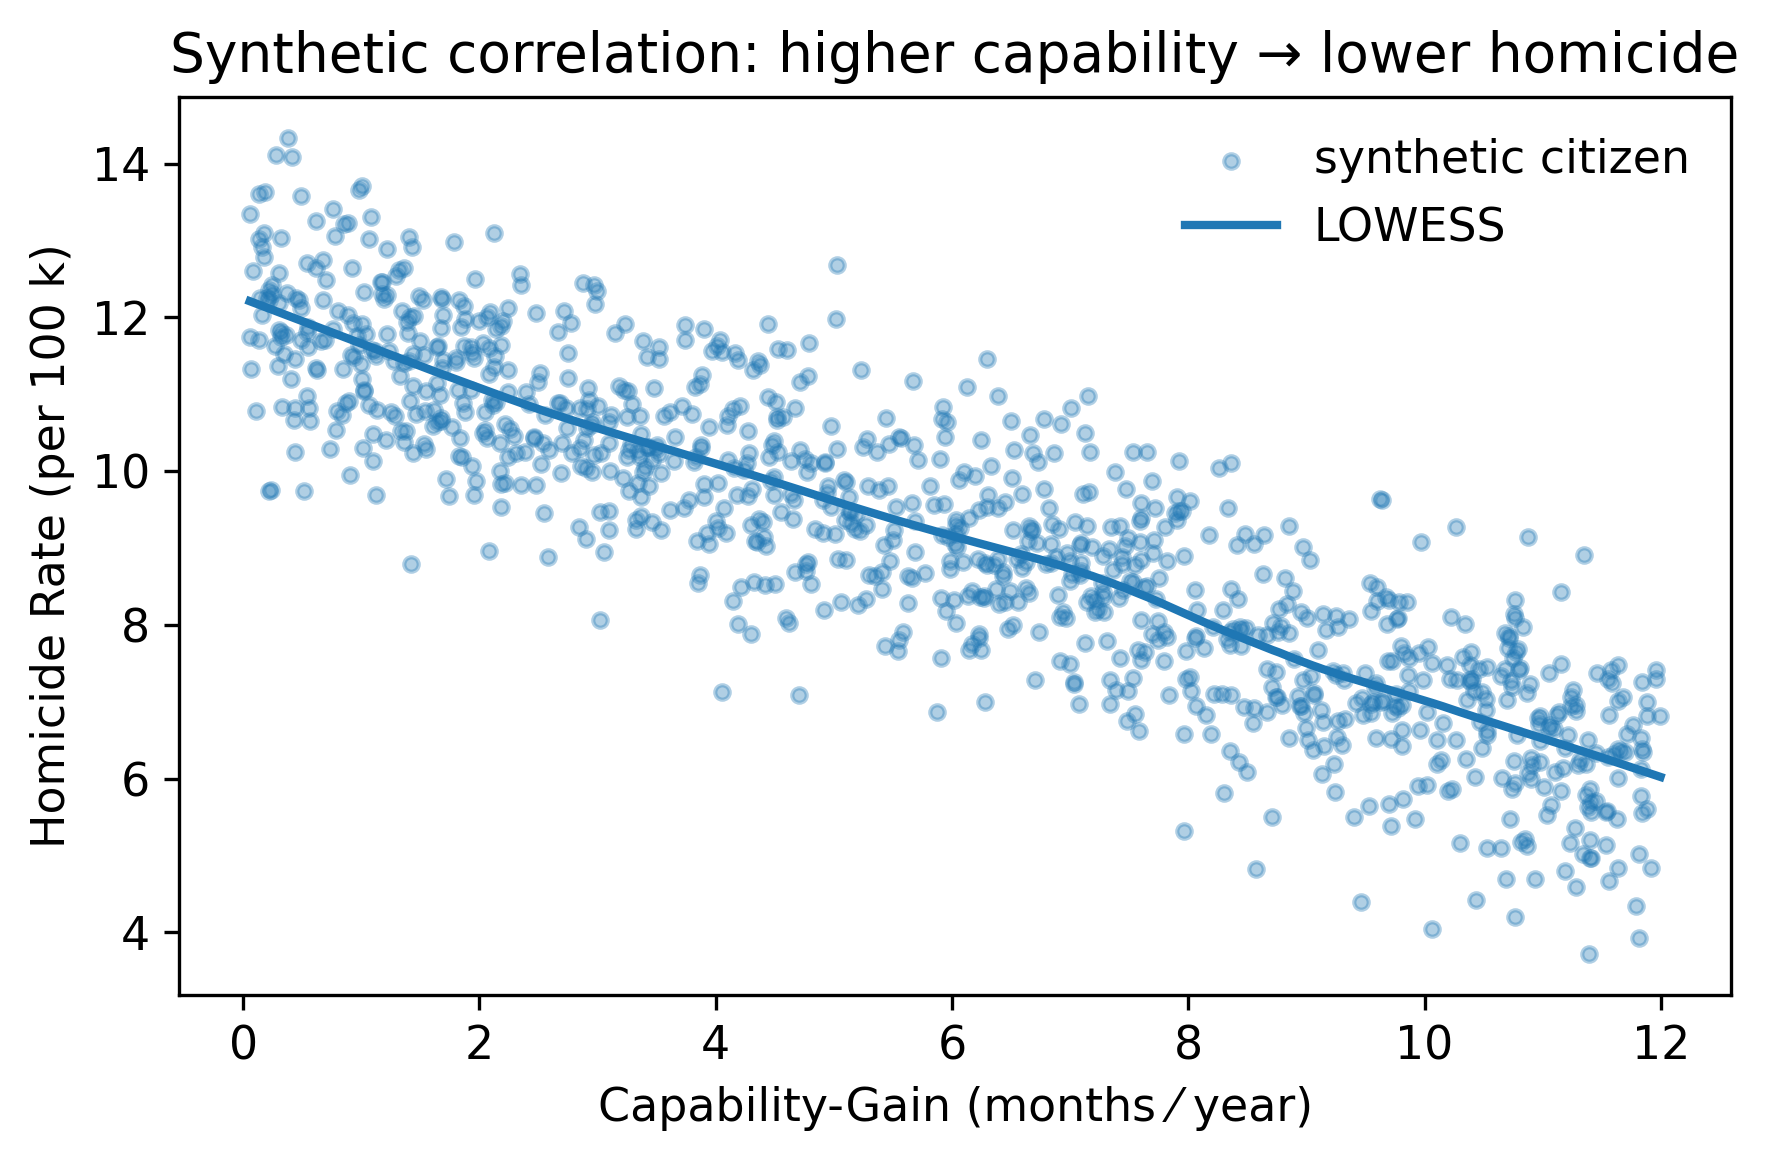

In [ ]:
plt.rcParams.update({'font.size': 11})
plt.figure(figsize=(6,4), dpi=300)
plt.scatter(cg, hr, s=12, alpha=.35, label='synthetic citizen')
low = lowess(hr, cg, frac=0.3)
plt.plot(low[:,0], low[:,1], linewidth=2, label='LOWESS')
plt.xlabel('Capability-Gain (months ⁄ year)')
plt.ylabel('Homicide Rate (per 100 k)')
plt.title('Synthetic correlation: higher capability → lower homicide')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('cg_hr_plot.png', dpi=300, bbox_inches='tight')


In [6]:
from google.colab import files
files.download('cg_hr_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>